In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
filepath = 'D:\Sales Analysis\data'

In [3]:
files = [file for file in os.listdir(filepath) if not file.startswith('.')] 

In [4]:
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [5]:
all_data = 'D:\Sales Analysis\alldata'

In [6]:
all_months_data = pd.DataFrame()
for file in files:
    current_data = pd.read_csv(filepath+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv(r'D:\Sales Analysis\alldata\all_data.csv', index=False)

Read saved file agian

In [7]:
df = pd.read_csv(r'D:\Sales Analysis\alldata\all_data.csv')

In [8]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [9]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [10]:
df.shape

(186850, 6)

In [11]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [12]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [13]:
df.dropna(how='all',inplace=True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [14]:
df.Product.unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor',
       'Product'], dtype=object)

# Most Sold Items 

In [15]:
df.Product.mode()

0    USB-C Charging Cable
dtype: object

### USB-C Charging Cable

In [16]:
df['Product'].value_counts()[:5].sort_values(ascending=False)

USB-C Charging Cable        21903
Lightning Charging Cable    21658
AAA Batteries (4-pack)      20641
AA Batteries (4-pack)       20577
Wired Headphones            18882
Name: Product, dtype: int64

In [17]:
from collections import Counter

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
c = dict(Counter(df.Product))

In [20]:
c

{'USB-C Charging Cable': 21903,
 'Bose SoundSport Headphones': 13325,
 'Google Phone': 5525,
 'Wired Headphones': 18882,
 'Macbook Pro Laptop': 4724,
 'Lightning Charging Cable': 21658,
 '27in 4K Gaming Monitor': 6230,
 'AA Batteries (4-pack)': 20577,
 'Apple Airpods Headphones': 15549,
 'AAA Batteries (4-pack)': 20641,
 'iPhone': 6842,
 'Flatscreen TV': 4800,
 '27in FHD Monitor': 7507,
 '20in Monitor': 4101,
 'LG Dryer': 646,
 'ThinkPad Laptop': 4128,
 'Vareebadd Phone': 2065,
 'LG Washing Machine': 666,
 '34in Ultrawide Monitor': 6181,
 'Product': 355}

In [21]:
item_value = sorted(c.items() , reverse=True, key=lambda x: x[1])

In [22]:
dict(item_value[:6])

{'USB-C Charging Cable': 21903,
 'Lightning Charging Cable': 21658,
 'AAA Batteries (4-pack)': 20641,
 'AA Batteries (4-pack)': 20577,
 'Wired Headphones': 18882,
 'Apple Airpods Headphones': 15549}

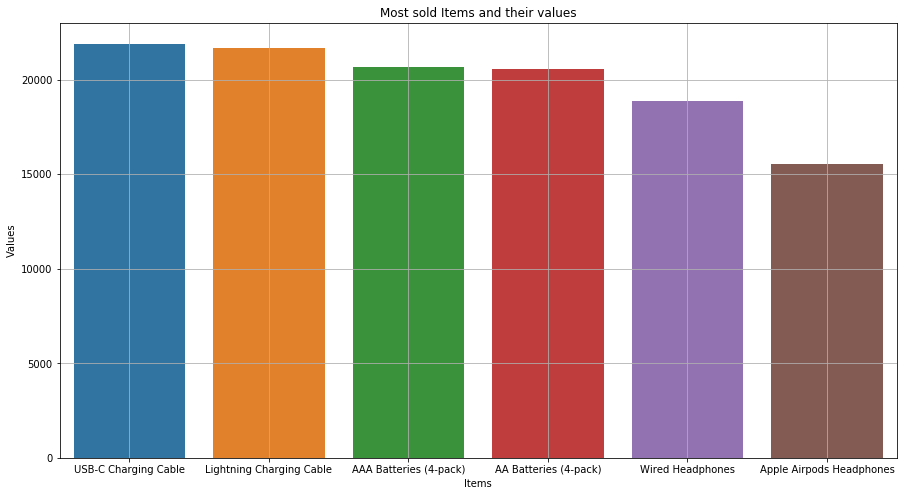

In [23]:
plt.figure(figsize=(15,8))
sns.barplot(x=list(dict(item_value[:6]).keys()), y=list(dict(item_value[:6]).values()))
plt.xlabel('Items')
plt.ylabel("Values")
plt.title("Most sold Items and their values")
plt.grid(True)

In [24]:
df = df[df['Order Date'].str[0:2]!='Or']

In [25]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [26]:
# change datatype of Quantity Ordered  and Price Each  column
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)
df['Price Each'] = df['Price Each'].astype(float)


In [27]:
df.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

Month column seperate 
and 
add city column

In [28]:
df['Order Date'].str[0:2].astype(int)

0         4
2         4
3         4
4         4
5         4
         ..
186845    9
186846    9
186847    9
186848    9
186849    9
Name: Order Date, Length: 185950, dtype: int32

In [29]:
df['Month'] = df['Order Date'].str[0:2].astype(int)

In [30]:
df.tail(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016",9


In [31]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


In [32]:
len(df['Order Date'].unique())

142395

In [33]:
# df.pop('Order Date')

In [34]:
# df.pop('Purchase Address')

In [35]:
df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)


# Lets see sales per month

In [36]:
df['Sales'] = (df['Quantity Ordered'] * df['Price Each']).astype(int)

In [37]:
# df['Sales'].values

In [38]:
df.groupby('Month').sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1815143
2,13449,2.188885e+06,2193165
3,17005,2.791208e+06,2795907
4,20558,3.367671e+06,3377215
5,18667,3.135125e+06,3140375
6,15253,2.562026e+06,2567871
7,16072,2.632540e+06,2637209
8,13448,2.230345e+06,2235667
9,13109,2.084992e+06,2088915


In [39]:
df.groupby('Month')['Sales'].sum()

Month
1     1815143
2     2193165
3     2795907
4     3377215
5     3140375
6     2567871
7     2637209
8     2235667
9     2088915
10    3721615
11    3186604
12    4594929
Name: Sales, dtype: int32

In [40]:
df.groupby('Month')['Price Each'].sum()

Month
1     1.811768e+06
2     2.188885e+06
3     2.791208e+06
4     3.367671e+06
5     3.135125e+06
6     2.562026e+06
7     2.632540e+06
8     2.230345e+06
9     2.084992e+06
10    3.715555e+06
11    3.180601e+06
12    4.588415e+06
Name: Price Each, dtype: float64

[1815143 2193165 2795907 3377215 3140375 2567871 2637209 2235667 2088915
 3721615 3186604 4594929]


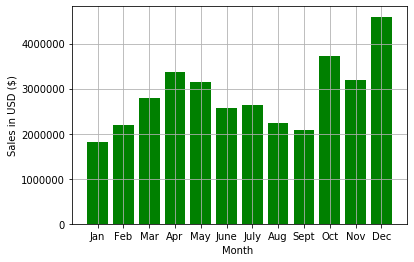

In [41]:
months = ["Jan",'Feb',"Mar","Apr",'May','June','July','Aug','Sept','Oct',"Nov","Dec"]
sales = df.groupby('Month')['Sales'].sum().values
print(sales)
plt.bar(months,sales,color='g')
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month ')
plt.grid(True)
plt.show()

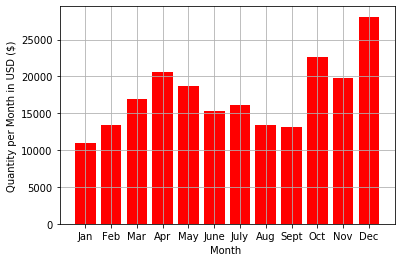

In [42]:
qt_per_month = df.groupby('Month')['Quantity Ordered'].sum().values
plt.bar(months,qt_per_month,color = 'r')
plt.xticks(months)
plt.ylabel('Quantity per Month in USD ($)')
plt.xlabel('Month ')
plt.grid(True)
plt.show()

# Most product selling city

In [43]:
df.groupby('City')['Quantity Ordered'].sum()

City
Atlanta  (GA)          16602
Austin  (TX)           11153
Boston  (MA)           22528
Dallas  (TX)           16730
Los Angeles  (CA)      33289
New York City  (NY)    27932
Portland  (ME)          2750
Portland  (OR)         11303
San Francisco  (CA)    50239
Seattle  (WA)          16553
Name: Quantity Ordered, dtype: int32

In [44]:
df.groupby('City')['Sales'].sum()

City
Atlanta  (GA)          2784555
Austin  (TX)           1812297
Boston  (MA)           3646904
Dallas  (TX)           2757017
Los Angeles  (CA)      5430629
New York City  (NY)    4645903
Portland  (ME)          447951
Portland  (OR)         1863342
San Francisco  (CA)    8229136
Seattle  (WA)          2736881
Name: Sales, dtype: int32

In [45]:
df.groupby('City').sum()

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2784555
Austin (TX),11153,1.809874e+06,69829,1812297
Boston (MA),22528,3.637410e+06,141112,3646904
Dallas (TX),16730,2.752628e+06,104620,2757017
Los Angeles (CA),33289,5.421435e+06,208325,5430629
New York City (NY),27932,4.635371e+06,175741,4645903
Portland (ME),2750,4.471893e+05,17144,447951
Portland (OR),11303,1.860558e+06,70621,1863342
San Francisco (CA),50239,8.211462e+06,315520,8229136


In [46]:
city = df.groupby('City').sum()

In [47]:
city.head()

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2784555
Austin (TX),11153,1.809874e+06,69829,1812297
Boston (MA),22528,3.637410e+06,141112,3646904
Dallas (TX),16730,2.752628e+06,104620,2757017
Los Angeles (CA),33289,5.421435e+06,208325,5430629


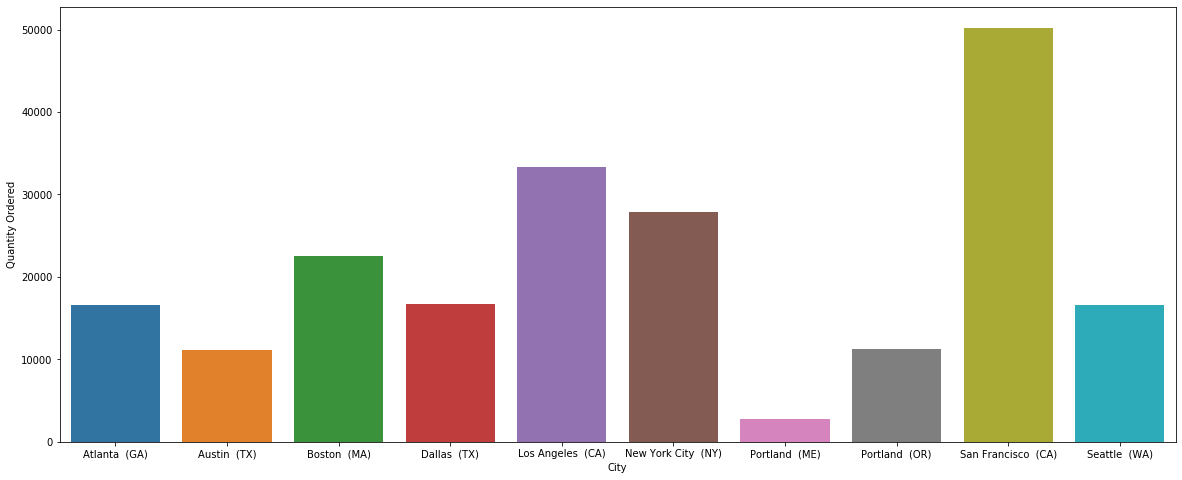

In [48]:
plt.figure(figsize=(20,8))
sns.barplot(x=city.index , y='Quantity Ordered', data=city)


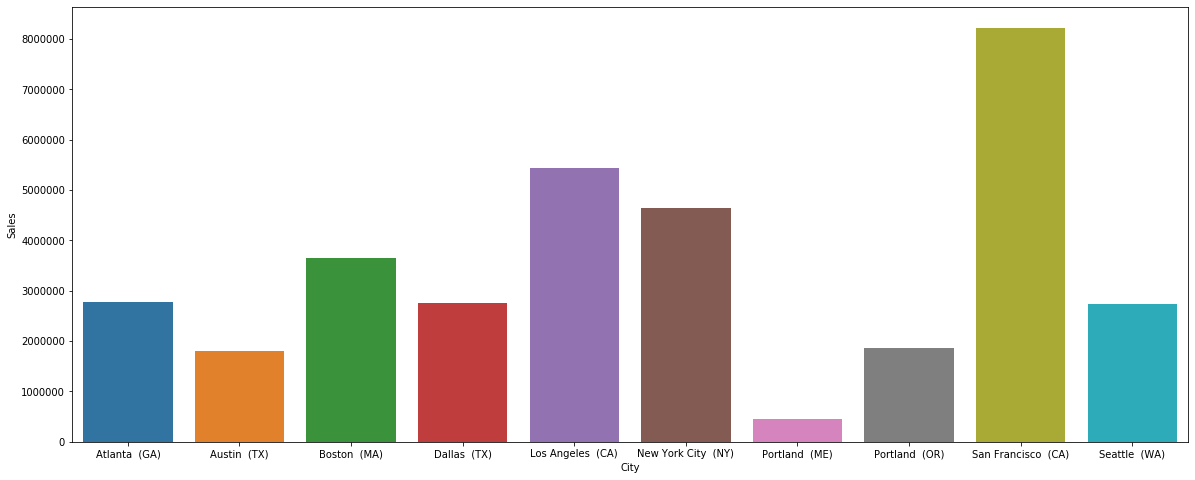

In [49]:
plt.figure(figsize=(20,8))

sns.barplot(x=city.index , y='Sales', data=city)

# Time to display ad to maximize purchase rate

In [50]:
df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour
df['Minute'] = pd.to_datetime(df['Order Date']).dt.minute
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23,8,46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99,22,30
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600,14,38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11,14,38
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11,9,27


In [51]:
# len(Counter(df.Hour).keys())

In [52]:
sorted(Counter(df.Hour).values())[::-1][:5]

[12905, 12587, 12411, 12280, 12228]

In [53]:
time_occr = Counter(df.Hour)

In [54]:
# time_occr

In [55]:
time_oc = list(time_occr.items())

In [56]:
sorted(time_oc, key=lambda tup:(-tup[1], tup[0]))[:5]

[(19, 12905), (12, 12587), (11, 12411), (18, 12280), (20, 12228)]

# Time for ad:
## 7 PM , 12 AM ,11 AM